In [ ]:
#installation part
!pip install captcha


In [1]:
#importing libraries
from captcha.image import ImageCaptcha

In [2]:
#defining the size of the captcha 
image= ImageCaptcha(width = 500 , height =400)

In [3]:
data=image.generate("pic")

In [4]:
#this will save the image on the working directory. You can define the location manually
image.write('nasiksami','demo.png')

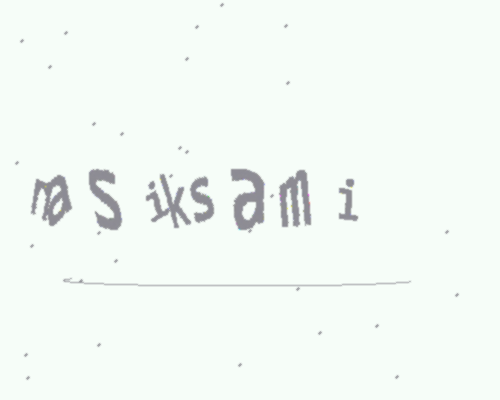

In [5]:
#Displaying the image file in the notebook
from IPython.display import Image
Image("demo.png")

In [23]:
### image analysis

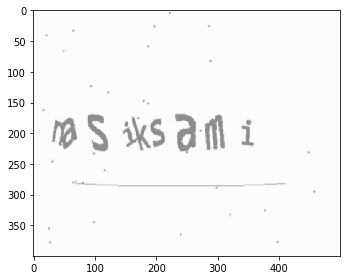

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

image = imread('demo.png', as_gray=True)
imshow(image)

In [25]:
#we converted it into grayscale

In [27]:
image.shape, image
#so basically this is the height and width of our captcha image

((400, 500),
 array([[0.9849098, 0.9849098, 0.9849098, ..., 0.9849098, 0.9849098,
         0.9849098],
        [0.9849098, 0.9849098, 0.9849098, ..., 0.9849098, 0.9849098,
         0.9849098],
        [0.9849098, 0.9849098, 0.9849098, ..., 0.9849098, 0.9849098,
         0.9849098],
        ...,
        [0.9849098, 0.9849098, 0.9849098, ..., 0.9849098, 0.9849098,
         0.9849098],
        [0.9849098, 0.9849098, 0.9849098, ..., 0.9849098, 0.9849098,
         0.9849098],
        [0.9849098, 0.9849098, 0.9849098, ..., 0.9849098, 0.9849098,
         0.9849098]]))

In [31]:
#The image shape here is 500 x 400. Hence, the number of features should be 200,000. 
#we can generate this using the reshape function from NumPy where we specify the dimension of the image:
#Here, we have our feature – which is a 1D array of length 200,000.

In [30]:

#pixel features

features = np.reshape(image, (500*400))

features.shape, features

((200000,),
 array([0.9849098, 0.9849098, 0.9849098, ..., 0.9849098, 0.9849098,
        0.9849098]))

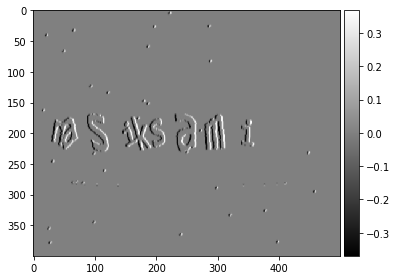

In [33]:

#importing the required libraries
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

#reading the image 
image = imread('demo.png',as_gray=True)

#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)
#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

imshow(edges_prewitt_vertical, cmap='gray')

In [34]:
#by this way we can extract the edges of in image

In [42]:
#audio Captcha 

In [43]:
#importing library
from captcha.audio import AudioCaptcha

In [44]:
audio = AudioCaptcha()

In [45]:
data = audio.generate('1')

In [46]:
#this will save the audio captcha on your working directory
#there will be many noise in the background but the audio will say the code loudly

audio.write('2441139','demo.mp3') 

149860

In [47]:
#lets try io play this audio on our notebook file.

In [ ]:
!pip install librosa

In [48]:
#loading our audio file
import librosa
x, sr = librosa.load('demo.mp3')

In [49]:
print(x.shape)
print(sr)

(412931,)
22050


In [50]:
#lets listen to the captcha audio

In [51]:
import IPython.display as ipd
ipd.Audio('demo.mp3') 

In [17]:
#lets do some visualization of the audio

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

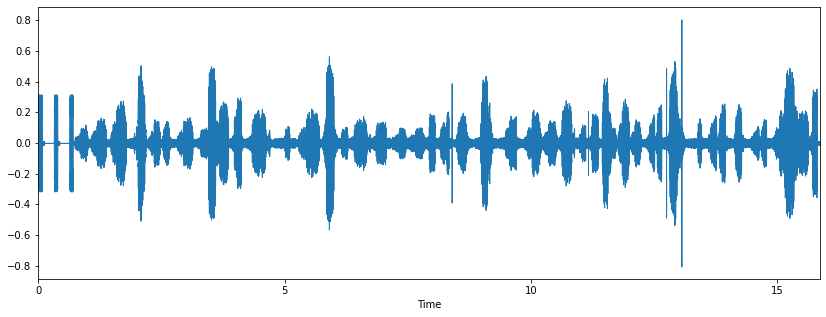

In [19]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

##### So we can see here are 7 high points on the plot. And these are our captcha code points.

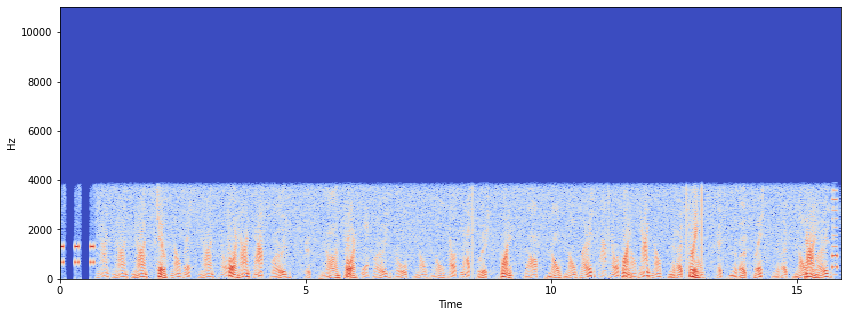

In [20]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [21]:
#Audio can also accept a NumPy array. Let's synthesize a pure tone at 440 Hz

import numpy
sr = 22050 # sample rate
T = 10.0    # seconds
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*numpy.sin(2*numpy.pi*440*t)                # pure sine wave at 440 Hz

In [22]:
ipd.Audio(x, rate=sr) # load a NumPy array